### Imporing necesarry libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('./HousePrice/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Analysis and Preprocessing

In [3]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [6]:
data.columns = data.columns.str.strip()  
data.columns = data.columns.str.lower()  
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [7]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

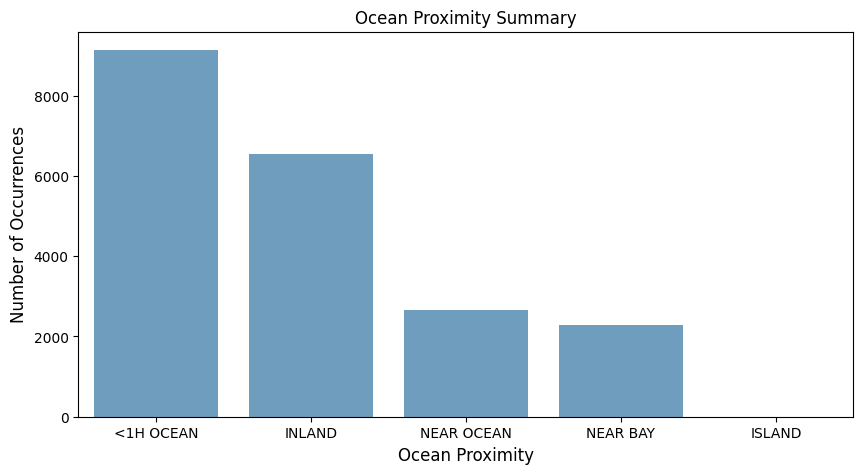

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
op_count = data['ocean_proximity'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=op_count.index, y=op_count.values, alpha=0.7)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()

In [9]:
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

In [10]:
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

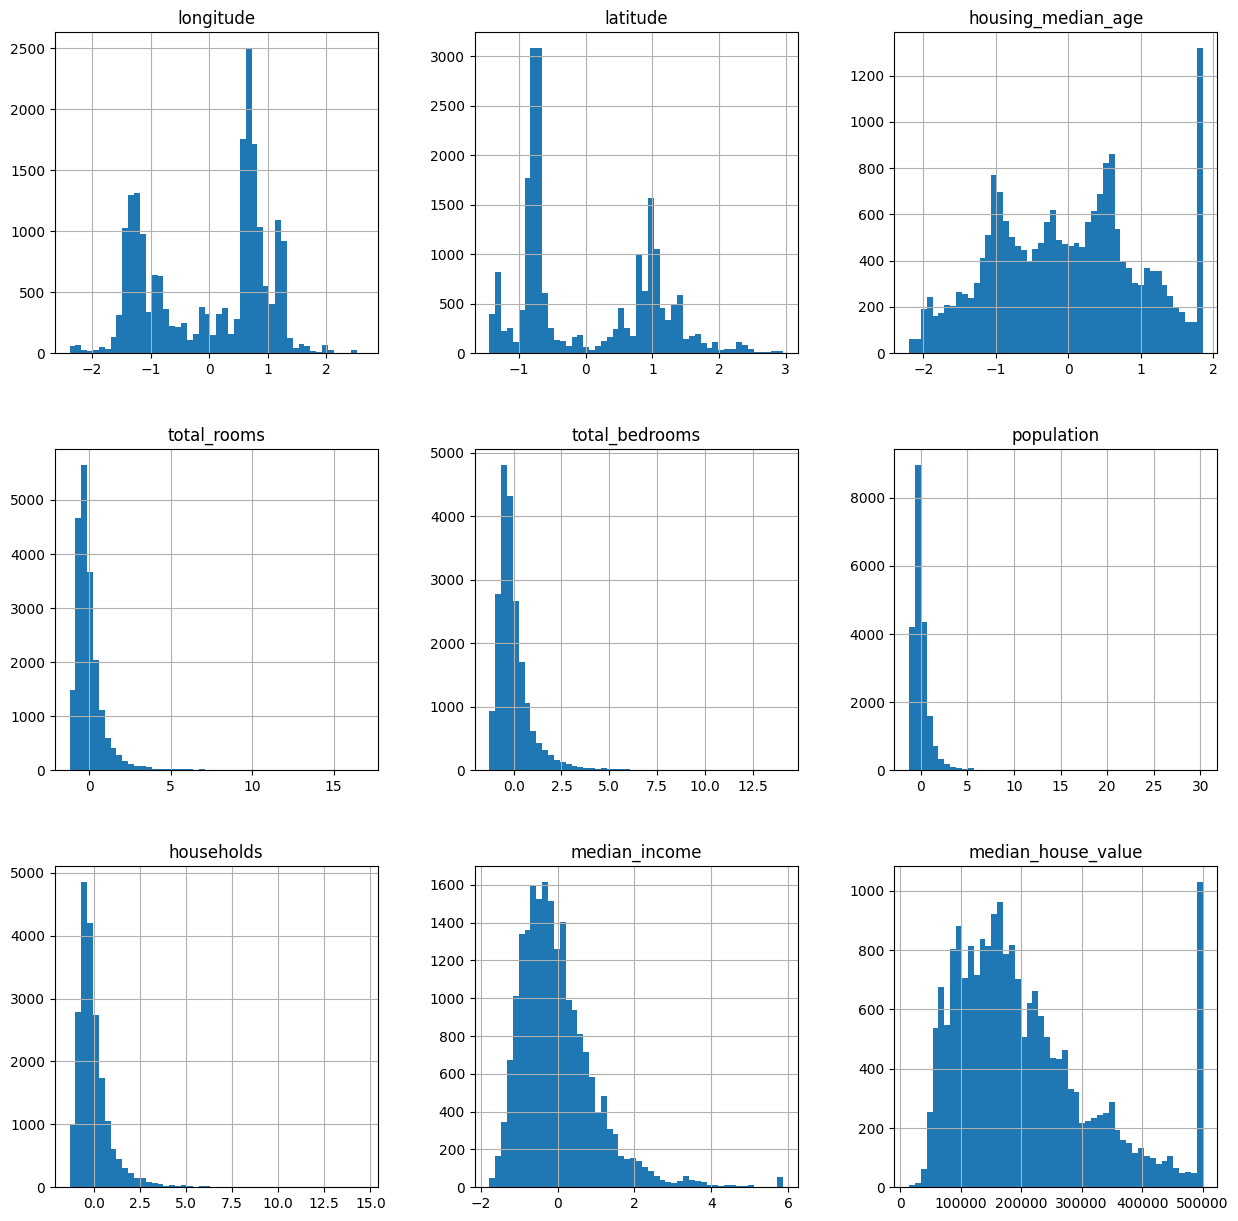

In [11]:
data.hist(bins=50, figsize=(15, 15))

In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

fig = px.box(data, y="median_house_value")
fig.update_layout(title="Boxplot of House Value",
                  yaxis_title="values",
                  xaxis_title="median_house_value",
                  showlegend=False,
                  height=600)


In [13]:
print(data.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [14]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']
print(data[numeric_features].describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  2.064000e+04  2.064000e+04        2.064000e+04  2.064000e+04   
mean  -8.526513e-15 -1.079584e-15        5.508083e-18  3.201573e-17   
std    1.000024e+00  1.000024e+00        1.000024e+00  1.000024e+00   
min   -2.385992e+00 -1.447568e+00       -2.196180e+00 -1.207283e+00   
25%   -1.113209e+00 -7.967887e-01       -8.453931e-01 -5.445698e-01   
50%    5.389137e-01 -6.422871e-01        2.864572e-02 -2.332104e-01   
75%    7.784964e-01  9.729566e-01        6.643103e-01  2.348028e-01   
max    2.625280e+00  2.958068e+00        1.856182e+00  1.681558e+01   

       total_bedrooms    population    households  median_income  
count    2.064000e+04  2.064000e+04  2.064000e+04   2.064000e+04  
mean    -9.363741e-17 -1.101617e-17  6.885104e-17   6.609700e-17  
std      1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00  
min     -1.277688e+00 -1.256123e+00 -1.303984e+00  -1.774299e+00  
25%     -5.718868e-01 -5.

In [17]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 12)
X_test shape: (4128, 12)
y_train shape: (16512,)
y_test shape: (4128,)


### Predictions with Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred


array([ 54055.44889898, 124225.33893718, 255489.37949165, ...,
       439180.98341181, 120797.55240621, 183386.04993584])

In [19]:
from sklearn.metrics import r2_score

mse = r2_score(y_test, y_pred)
mse

0.6254240620553604

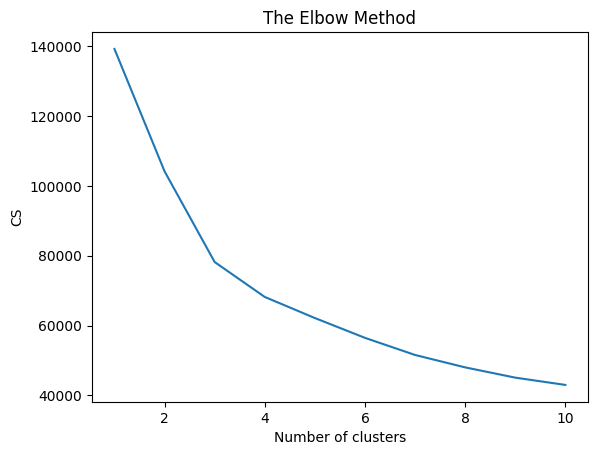

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### Kmeans + Linear Regression

In [21]:
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')
class ClusteringBasedRegression:
    def __init__(self,n_clusters,random_state):
        self.n_clusters = n_clusters
        self.regressors = []
        self.clusters= []
        self.kmeans = KMeans(n_clusters=n_clusters,random_state=random_state)
    
    def fit(self,x,y):
        self.kmeans.fit(x)
        labels = self.kmeans.labels_



        for i in range(self.n_clusters):
            cluster = x[labels == i]
            self.clusters.append(cluster)

        for i in range(self.n_clusters):
            regressor = LinearRegression()
            regressor.fit(self.clusters[i],y[self.clusters[i].index])
            self.regressors.append(regressor)

    def predict(self,x):
        labels = self.kmeans.predict(x)
        predictions = []
        for i in range(len(x)):
            cluster = labels[i]
            prediction = self.regressors[cluster].predict((x.iloc[i].values).reshape(1,-1))[0]
            predictions.append(prediction)
        return predictions
cbr = ClusteringBasedRegression(3,42)

cbr.fit(X_train,y_train)
y_pred_cbr = cbr.predict(X_test)

In [22]:
from sklearn.metrics import r2_score

mse = r2_score(y_test, y_pred_cbr)
mse

0.6385084936082883

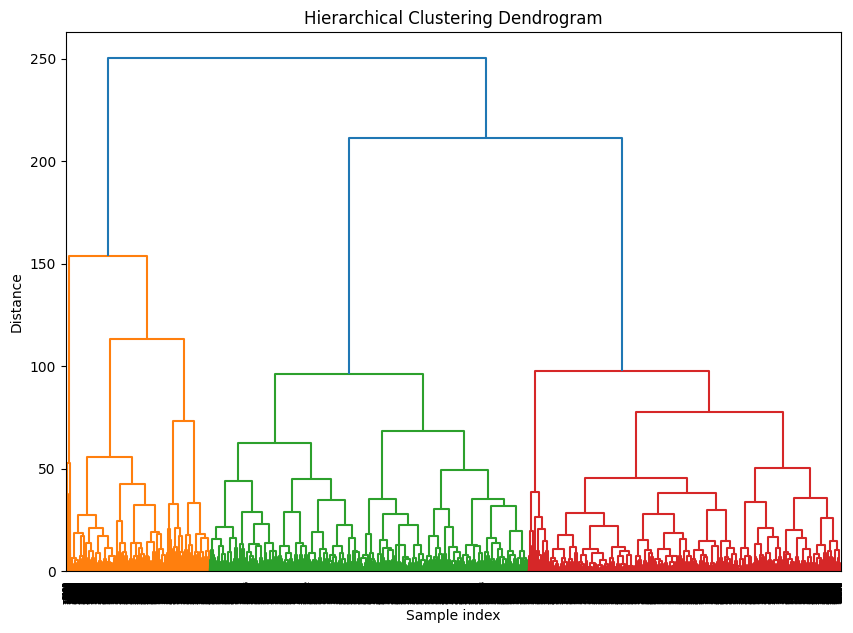

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = X_train.to_numpy()

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

### Random Forest

In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [25]:
r2 = r2_score(y_test, y_pred)

print(f'R-squared Score: {r2}')

R-squared Score: 0.8165160977560968


### Hirarchial Clustering + Linear Regression

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression

class HClusteringBasedRegression:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.regressors = []
        self.clusters = []
        self.hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    
    def fit(self, x, y):
        self.hierarchical.fit(x)
        labels = self.hierarchical.labels_

        for i in range(self.n_clusters):
            cluster = x[labels == i]
            self.clusters.append(cluster)

        for i in range(self.n_clusters):
            regressor = LinearRegression()
            cluster_indices = labels == i
            regressor.fit(x[cluster_indices], y[cluster_indices])
            self.regressors.append(regressor)

    def predict(self, x):
        labels = self.hierarchical.fit_predict(x)
        predictions = []
        for i in range(len(x)):
            cluster = labels[i]
            prediction = self.regressors[cluster].predict((x.iloc[i].values).reshape(1,-1))[0]
            predictions.append(prediction)
        return predictions

cbr = HClusteringBasedRegression(3)
cbr.fit(X_train, y_train)
predictions = cbr.predict(X_test)
predictions

[40580.15444237512,
 90936.08122297541,
 232523.30722909537,
 252506.40740404828,
 265300.84342822904,
 91469.19201263195,
 318070.4012795284,
 242567.70379408798,
 270664.16137974215,
 408953.3515500029,
 153213.15815443435,
 147971.96164642402,
 97967.44979226202,
 53353.5556118878,
 219667.73959021113,
 107885.90989666531,
 299906.6626893492,
 247648.1030166437,
 227568.21081283654,
 118541.06278780814,
 230942.5522323897,
 282493.1467364734,
 133136.0548337691,
 292576.049717764,
 144881.67098863388,
 61209.31469949355,
 56763.331893957395,
 257316.74561755313,
 143159.0983075202,
 323071.7271994849,
 173709.44599138905,
 194042.32465876784,
 205387.1460800781,
 412999.5015618835,
 253466.42487660504,
 165304.75253125146,
 341865.73027347215,
 153082.85888324532,
 169598.91742769294,
 225568.78458158794,
 295786.82432549633,
 176560.4916062296,
 150581.9489288718,
 122603.17695782651,
 99579.47314357045,
 111888.40182595149,
 201766.70570000427,
 180379.69343185588,
 235395.1159924

In [27]:
from sklearn.metrics import r2_score

mse = r2_score(y_test, predictions)
mse

0.64377928815749

### KMeans + Random Forest

In [28]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import warnings

warnings.filterwarnings('ignore')

class ClusteringBasedRandomForestRegression:
    def __init__(self, n_clusters, random_state):
        self.n_clusters = n_clusters
        self.regressors = []
        self.clusters = []
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    
    def fit(self, X, y):
        self.kmeans.fit(X)
        labels = self.kmeans.labels_

        for i in range(self.n_clusters):
            cluster = X[labels == i]
            self.clusters.append(cluster)

        for i in range(self.n_clusters):
            regressor = RandomForestRegressor(n_estimators=100,random_state=42)
            regressor.fit(self.clusters[i], y[self.clusters[i].index])
            self.regressors.append(regressor)

    def predict(self, X):
        labels = self.kmeans.predict(X)
        predictions = []
        for i in range(len(X)):
            cluster = labels[i]
            prediction = self.regressors[cluster].predict(X.iloc[i].values.reshape(1, -1))[0]
            predictions.append(prediction)
        return predictions

cbr = ClusteringBasedRandomForestRegression(n_clusters=4, random_state=42)
cbr.fit(X_train, y_train)




y_pred = cbr.predict(X_test)

In [29]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.8187027176753927

### Hirarchial + Random Forest

In [30]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

class HClusteringBasedRandomForestRegression:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.regressors = []
        self.clusters = []
        self.hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    
    def fit(self, x, y):
        self.hierarchical.fit(x)
        labels = self.hierarchical.labels_

        for i in range(self.n_clusters):
            cluster = x[labels == i]
            self.clusters.append(cluster)

        for i in range(self.n_clusters):
            regressor = RandomForestRegressor()
            cluster_indices = labels == i
            regressor.fit(x[cluster_indices], y[cluster_indices])
            self.regressors.append(regressor)

    def predict(self, x):
        labels = self.hierarchical.fit_predict(x)
        predictions = []
        for i in range(len(x)):
            cluster = labels[i]
            prediction = self.regressors[cluster].predict((x.iloc[i].values).reshape(1,-1))[0]
            predictions.append(prediction)
        return predictions

cbr = HClusteringBasedRandomForestRegression(3)
cbr.fit(X_train, y_train)
predictions = cbr.predict(X_test)
predictions

[53027.0,
 72568.0,
 473797.43,
 255253.0,
 268737.01,
 174878.0,
 222384.01,
 169422.0,
 279898.02,
 478122.71,
 129086.0,
 204214.0,
 147989.0,
 207873.03,
 252884.0,
 175557.0,
 186258.0,
 167735.0,
 158594.0,
 95424.0,
 370135.08,
 459233.41,
 131315.0,
 435833.33,
 185005.0,
 58357.0,
 198741.02,
 97505.0,
 151833.0,
 380064.07,
 89038.0,
 146542.0,
 244224.08,
 479909.63,
 289360.0,
 250177.02,
 332837.02,
 163516.0,
 129352.0,
 179964.01,
 347688.07,
 96123.0,
 114749.0,
 195773.0,
 151888.0,
 212158.02,
 130600.0,
 164880.0,
 246194.0,
 105390.0,
 267356.0,
 202201.0,
 150640.0,
 70116.0,
 141784.0,
 123292.0,
 93819.0,
 223881.0,
 269202.06,
 191825.0,
 406757.19,
 292414.1,
 111773.0,
 103148.0,
 283769.03,
 196428.0,
 150214.0,
 152405.0,
 134945.0,
 156021.01,
 135576.0,
 207665.0,
 92090.0,
 201645.0,
 217335.0,
 191056.0,
 417880.12,
 202475.0,
 184256.0,
 359811.3,
 77038.0,
 195796.01,
 179780.0,
 174325.0,
 409437.21,
 249958.04,
 105159.01,
 73117.0,
 179982.0,
 19371

In [31]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
r2

0.806710030863168

### DBSCAN + Linear Regression

In [32]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings


warnings.filterwarnings('ignore')

class ClusteringBasedRegression:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.regressors = []
        self.clusters = []
        self.dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    
    def fit(self, X, y):
        labels = self.dbscan.fit_predict(X)
        unique_labels = set(labels)
        print(unique_labels)
        for label in unique_labels:
            if label == -1:
                continue
            cluster = X[labels == label]
            self.clusters.append(cluster)
            
            regressor = LinearRegression()
            regressor.fit(cluster, y[labels == label])
            self.regressors.append(regressor)
    
    def predict(self, X):
        labels = self.dbscan.fit_predict(X)
        predictions = []
        
        for i in range(len(X)):
            cluster_label = labels[i]
            if cluster_label == -1:
                prediction = np.mean([regressor.predict(X.iloc[i].values.reshape(1, -1))[0] for regressor in self.regressors])
            else:
                prediction = self.regressors[cluster_label].predict(X.iloc[i].values.reshape(1, -1))[0]
            predictions.append(prediction)
        
        return predictions


cbr = ClusteringBasedRegression(eps=1.3, min_samples=5)
cbr.fit(X_train, y_train)
y_pred = cbr.predict(X_test)

{0, 1, 2, 3, -1}


In [33]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.6330798946777418